# Flight Price Prediction

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 
#we dont need to write plt.show(), the graphs will show here it self

In [2]:
#Importing the dataset
df = pd.read_excel('Datasets/Flight/Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Feature Engineering 

In [7]:
# Converting the Date of Journey to day month format

df["J_Day"]=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.day
df["J_Month"]=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month
df["J_Year"]=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.year
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [8]:
df.head(4)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,J_Day,J_Month,J_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019


In [9]:
# Converting the arrival time to time format.

df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [10]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,J_Day,J_Month,J_Year,Arrival_min,Arrival_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,10,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,15,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,25,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,30,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,35,21


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   J_Day            10683 non-null  int64 
 10  J_Month          10683 non-null  int64 
 11  J_Year           10683 non-null  int64 
 12  Arrival_min      10683 non-null  int64 
 13  Arrival_hour     10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB


In [12]:
#Converting the departure time to time format
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df.drop('Dep_Time',axis = 1,inplace = True)

In [13]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,J_Day,J_Month,J_Year,Arrival_min,Arrival_hour,Dep_min,Dep_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,10,1,20,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,15,13,50,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,25,4,25,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,30,23,5,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,35,21,50,16


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   J_Day            10683 non-null  int64 
 9   J_Month          10683 non-null  int64 
 10  J_Year           10683 non-null  int64 
 11  Arrival_min      10683 non-null  int64 
 12  Arrival_hour     10683 non-null  int64 
 13  Dep_min          10683 non-null  int64 
 14  Dep_hour         10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


In [15]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [16]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,J_Day,J_Month,J_Year,Arrival_min,Arrival_hour,Dep_min,Dep_hour
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,25,9,45,9


In [17]:
df.drop(9039,axis = 0,inplace = True)

In [18]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,J_Day,J_Month,J_Year,Arrival_min,Arrival_hour,Dep_min,Dep_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,10,1,20,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,15,13,50,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,25,4,25,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,30,23,5,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,35,21,50,16


In [19]:
df.drop('Route',axis = 1, inplace = True)

In [20]:
df.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,J_Day,J_Month,J_Year,Arrival_min,Arrival_hour,Dep_min,Dep_hour
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,10,1,20,22


In [21]:
#Splitting the Flight Duration in Hour and Minuites
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i]= duration[i].strip() + ' 0m'
        else:
            duration[i]= '0h ' +duration[i]
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[1]))

In [22]:
df['Duration_hours']=duration_hours
df['Duration_mins']= duration_mins

In [23]:
df.drop('Duration',axis = 1, inplace = True)

In [24]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,J_Day,J_Month,J_Year,Arrival_min,Arrival_hour,Dep_min,Dep_hour,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,10,1,20,22,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,15,13,50,5,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,25,4,25,9,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,30,23,5,18,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,35,21,50,16,4,45


### Handling Categorical Variables

In [25]:
#Uniqueness in Airline
print('Airline')
print('-'*7)
print(df['Airline'].value_counts())
print('\n')

#Uniqueness in Source
print('Source')
print('-'*6)
print(df['Source'].value_counts())
print('\n')

#Uniqueness in Destination
print('Destination')
print('-'*11)
print(df['Destination'].value_counts())
print('\n')

#Uniqueness in Total Stops
print('Total_Stops')
print('-'*11)
print(df['Total_Stops'].value_counts())
print('\n')

#Uniqueness in Additional Info
print('Additional Info')
print('-'*15)
print(df['Additional_Info'].value_counts())
print('\n')

Airline
-------
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Source
------
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


Destination
-----------
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


Total_Stops
-----------
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


Additional In

In [26]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [27]:
#Label Encoding For Total Stops Feature
Stops={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
df['Total_Stops']=df['Total_Stops'].map(Stops)

In [28]:
df[df['Airline'] == 'Trujet']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,J_Day,J_Month,J_Year,Arrival_min,Arrival_hour,Dep_min,Dep_hour,Duration_hours,Duration_mins
2878,Trujet,Mumbai,Hyderabad,1,No info,4140,6,3,2019,20,16,5,13,3,15


In [29]:
df.drop(2878,inplace=True)
#Dropping Trujet as the Airline is having a high cardinality and this record is present only once,which won't affect much in the learning of the model.

In [30]:
#Additional Info Feature
df['Additional_Info'].value_counts()/len(df)*100

No info                         78.110664
In-flight meal not included     18.556315
No check-in baggage included     2.995974
1 Long layover                   0.177886
Change airports                  0.065537
Business class                   0.037450
No Info                          0.028087
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [31]:
df.drop(['Additional_Info'], axis = 1, inplace = True) 
# since No info is accounting for more than 75% of the data, thus dropping the column.

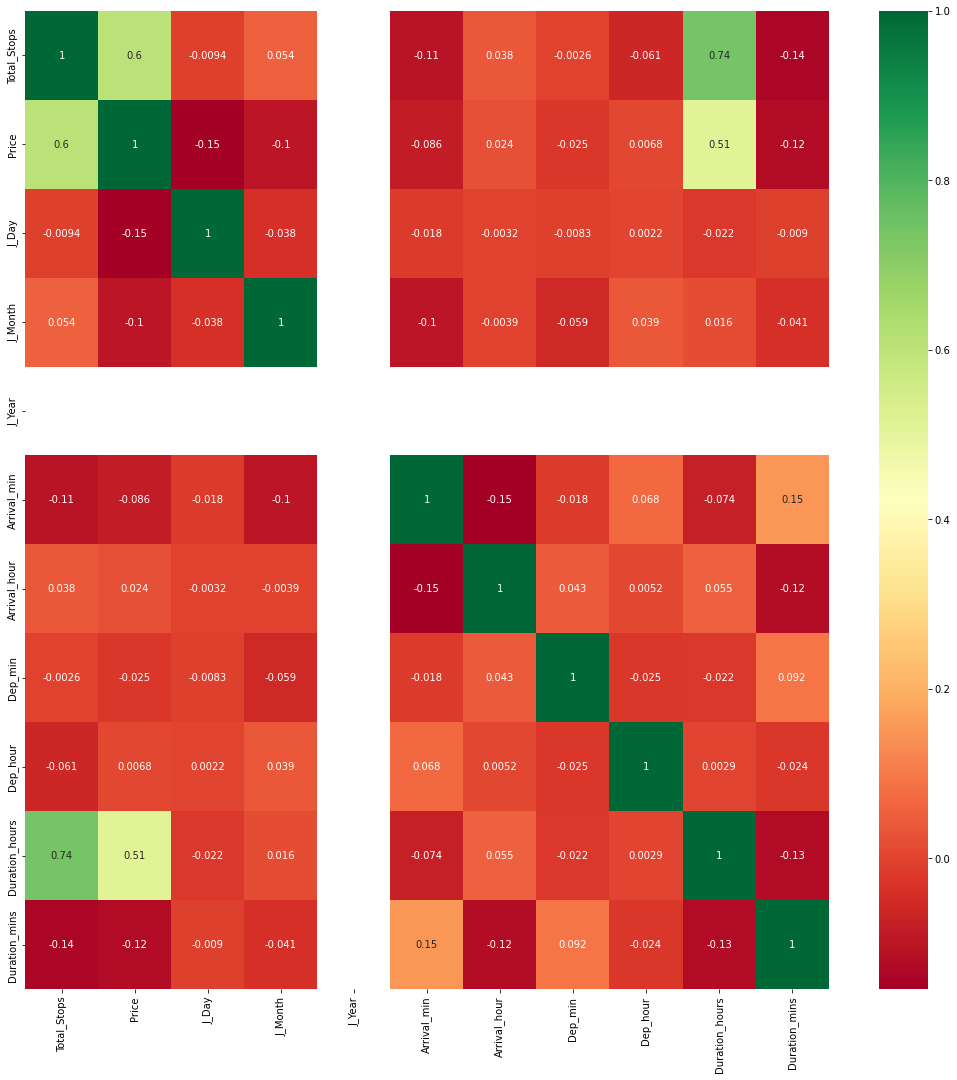

In [32]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10681 non-null  object
 1   Source          10681 non-null  object
 2   Destination     10681 non-null  object
 3   Total_Stops     10681 non-null  int64 
 4   Price           10681 non-null  int64 
 5   J_Day           10681 non-null  int64 
 6   J_Month         10681 non-null  int64 
 7   J_Year          10681 non-null  int64 
 8   Arrival_min     10681 non-null  int64 
 9   Arrival_hour    10681 non-null  int64 
 10  Dep_min         10681 non-null  int64 
 11  Dep_hour        10681 non-null  int64 
 12  Duration_hours  10681 non-null  int64 
 13  Duration_mins   10681 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.2+ MB


In [34]:
#Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [35]:
df['Airline']=labelencoder.fit_transform(df['Airline'])
df['Source']=labelencoder.fit_transform(df['Source'])
df['Destination']=labelencoder.fit_transform(df['Destination'])

In [36]:
df.shape

(10681, 14)

In [37]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,J_Day,J_Month,J_Year,Arrival_min,Arrival_hour,Dep_min,Dep_hour,Duration_hours,Duration_mins
0,3,0,5,0,3897,24,3,2019,10,1,20,22,2,50
1,1,3,0,2,7662,1,5,2019,15,13,50,5,7,25
2,4,2,1,2,13882,9,6,2019,25,4,25,9,19,0
3,3,3,0,1,6218,12,5,2019,30,23,5,18,5,25
4,3,0,5,1,13302,1,3,2019,35,21,50,16,4,45


# Test Data

In [38]:
dft = pd.read_excel('Datasets/Flight/Test_set.xlsx')
dft.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [39]:
# Preprocessing

print("Test data preprocessing")
print("-"*30)
print(dft.info())

print()
print()

print("Null values :")
print("-"*30)
dft.dropna(inplace = True)
print(dft.isnull().sum())

# EDA

# Date_of_Journey
dft["J_Day"] = pd.to_datetime(dft.Date_of_Journey, format="%d/%m/%Y").dt.day
dft["J_Month"] = pd.to_datetime(dft["Date_of_Journey"], format = "%d/%m/%Y").dt.month
dft.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
dft["Dep_hour"] = pd.to_datetime(dft["Dep_Time"]).dt.hour
dft["Dep_min"] = pd.to_datetime(dft["Dep_Time"]).dt.minute
dft.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
dft["Arrival_hour"] = pd.to_datetime(dft.Arrival_Time).dt.hour
dft["Arrival_min"] = pd.to_datetime(dft.Arrival_Time).dt.minute
dft.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(dft["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
            # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           
            # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
dft["Duration_hours"] = duration_hours
dft["Duration_mins"] = duration_mins
dft.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*30)
print(dft["Airline"].value_counts())

print()

print("Source")
print("-"*30)
print(dft["Source"].value_counts())

print()

print("Destination")
print("-"*30)
print(dft["Destination"].value_counts())

#Encoding the categorical variables

labelencoder = LabelEncoder()
dft['Airline']=labelencoder.fit_transform(dft['Airline'])
dft['Source']=labelencoder.fit_transform(dft['Source'])
dft['Destination']=labelencoder.fit_transform(dft['Destination'])

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
dft.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
dft.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

print()
print()

print("Shape of test data : ", dft.shape)

Test data preprocessing
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Inf

In [40]:
dft.head()

,Airline,Source,Destination,Total_Stops,J_Day,J_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,4,2,1,1,6,6,17,30,4,25,10,55
1,3,3,0,1,12,5,6,20,10,20,4,0
2,4,2,1,1,21,5,19,15,19,0,23,45
3,6,2,1,1,21,5,8,0,21,0,13,0
4,0,0,2,0,24,6,23,55,2,45,2,50


### Saving the processed data to csv

In [41]:
df.to_csv('preprocessed_data.csv',index_label = False)